In [3]:
import matplotlib.pyplot as plt
import numpy as np
from common.trajectory_analysis import Trajectory
from scipy import signal

import matplotlib


In [59]:
font = {#'family' : 'Arial',
        #'weight' : 'regular',
        'size'   : 14}


matplotlib.rc('font', **font)

#plt.rcParams.update({"mathtext.fontset": "dejavuserif"})
# plt.rcParams.update({"mathtext.fontset": "cm"})
plt.rcParams.update({"mathtext.fontset": "stixsans"})

title_size = 14
formula_size = 16

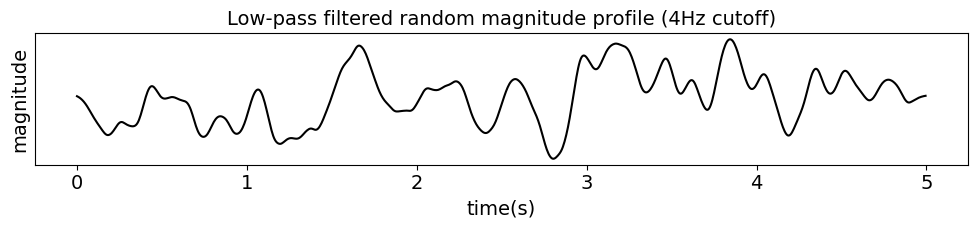

In [60]:
np.random.seed(152)

def butterworth(x, cutoff, samples_per_s=200, filter_order=2):
    B, A = signal.butter(filter_order, cutoff / (samples_per_s / 2), 'low')
    return signal.filtfilt(B, A, x, method="pad", padlen=10)


# make 4 different elliptic trajectories with different speeds randomized
# a?) linear speed randomized
# ) orbital angular speed 
# spin angular speed
# directional angular speed

# First show the profile of a randomized and smoothed magnitude


dt = 0.005
t0 = np.arange(0, 5, dt)
x0 = np.random.normal(loc=50, scale=70, size=t0.size)
x0[0:15] = 50
x0[-10:] = 50
x1 = butterworth(x0, 4)

plt.figure(figsize=(10, 2.5))
plt.title("Low-pass filtered random magnitude profile (4Hz cutoff)", fontsize=title_size)
plt.plot(t0, x1, color="black")
plt.xlabel("time(s)")
plt.yticks([])
plt.ylabel("magnitude")
plt.tight_layout()
plt.savefig("Filtered magnitude profile.pdf", format="pdf")

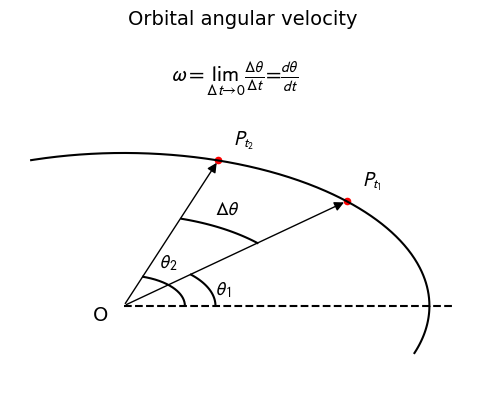

In [61]:
## generate ellipse
dt = 0.005
t0 = np.arange(0, 5, dt)

ys = 100 * np.sin(t0*2*np.pi * 0.2)
xs = 200 * np.cos(t0*2*np.pi * 0.2) 


plt.figure(figsize=(6,4))
plt.axis("equal"); plt.xticks([]); plt.yticks([])
plt.title("Orbital angular velocity\n\n\n", fontsize=title_size)
plt.suptitle("$\\omega = \\lim_{\\Delta t \\rightarrow 0} \\frac{\\Delta\\theta}{\\Delta t} = \\frac{d\\theta}{dt}$", fontsize=formula_size)
plt.plot(xs[:300], ys[:300], color="black")   ## ellipse
plt.plot(xs[950:], ys[950:], color="black")   ## ellipse

plt.scatter((xs[120], xs[200]), (ys[120], ys[200]), s=20, color="red") ## P
plt.annotate("$P_{t_1}$", xy=(xs[120]+10, ys[120]+10))
plt.annotate("$P_{t_2}$", xy=(xs[200]+10, ys[200]+10))

plt.plot(xs[120:200] * 0.60, ys[120:200]*0.60, color="black") ## angle line
plt.annotate("$\\Delta\\theta$", xy=(60, 60))

plt.plot((0, 216), (0, 0), "--", color="black")
plt.plot(xs[0:120] * 0.30, ys[0:120]*0.30, color="black") ## angle line
plt.annotate("$\\theta_1$", xy=(60, 7))
plt.plot(xs[0:200] * 0.20, ys[0:200]*0.2, color="black") ## angle line
plt.annotate("$\\theta_2$", xy=(23, 25))

plt.axis("off")
plt.annotate("", xytext=(0, 0), xy=(xs[120], ys[120]), arrowprops=dict(arrowstyle="-|>", color="black"))
plt.annotate("", xytext=(0, 0), xy=(xs[200], ys[200]), arrowprops=dict(arrowstyle="-|>", color="black"))
plt.annotate("O", xy=(-20, -10))
plt.savefig("Orbital angular velocity diagram.pdf", format="pdf")
plt.show()


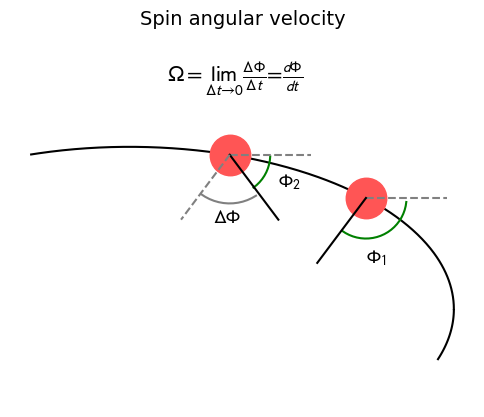

In [127]:
## generate ellipse
dt = 0.005
t0 = np.arange(0, 5, dt)

ys = 100 * np.sin(t0*2*np.pi * 0.2)
xs = 200 * np.cos(t0*2*np.pi * 0.2) 


plt.figure(figsize=(6,4))
plt.axis("equal"); plt.xticks([]); plt.yticks([])
plt.title("Spin angular velocity\n\n\n", fontsize=title_size)
plt.suptitle("$\\Omega = \\lim_{\\Delta t \\rightarrow 0} \\frac{\\Delta\\Phi}{\\Delta t} = \\frac{d \\Phi}{dt}$", fontsize=formula_size)

plt.plot(xs[:300], ys[:300], color="black")  
plt.plot(xs[950:], ys[950:], color="black")  
plt.axis("off")


plt.scatter((xs[120], xs[200]), (ys[120], ys[200]), s=850, color="#F55", zorder=10) ## P

plt.plot((xs[120], xs[120] +50), (ys[120], ys[120]), "--", color="gray", zorder=11)
plt.plot((xs[120], xs[120] -30), (ys[120], ys[120]-40), "-", color="black", zorder=11)

tc = np.arange(np.pi*1.3, 2*np.pi, 0.1)
cxs = 25 * np.cos(tc) + xs[120]
cys = 25 * np.sin(tc) + ys[120]
plt.plot(cxs, cys, color="green")
plt.annotate("$\\Phi_{1}$", xy=(xs[120], ys[120]-40))

plt.plot((xs[200], xs[200] +50), (ys[200], ys[200]), "--", color="gray", zorder=11)
plt.plot((xs[200], xs[200] +30), (ys[200], ys[200]-40), "-", color="black", zorder=11)
plt.plot((xs[200], xs[200] -30), (ys[200], ys[200]-40), "--", color="gray", zorder=11)

tc = np.arange(np.pi*1.7, 2*np.pi, 0.1)
cxs = 25 * np.cos(tc) + xs[200]
cys = 25 * np.sin(tc) + ys[200]
plt.plot(cxs, cys, color="green")
plt.annotate("$\\Phi_{2}$", xy=(xs[200]+30, ys[200]-20))

tc = np.arange(np.pi*1.3, 1.7*np.pi, 0.1)
cxs = 30 * np.cos(tc) + xs[200]
cys = 30 * np.sin(tc) + ys[200]
plt.plot(cxs, cys, color="gray")
plt.annotate("$\\Delta\\Phi$", xy=(xs[200]-10, ys[200]-42))

plt.savefig("Spin angular velocity diagram.pdf", format="pdf")
plt.show()


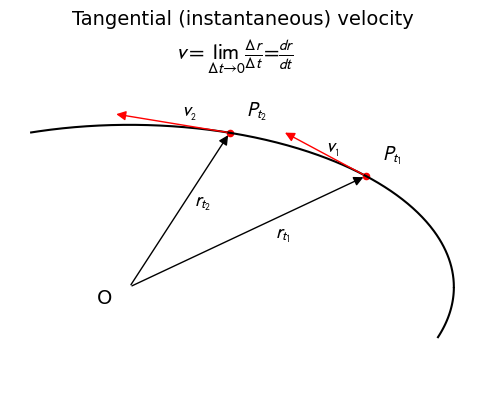

In [131]:
## generate ellipse
dt = 0.001
t0 = np.arange(0, 1, dt)
ys = 100 * np.sin(t0*2*np.pi * 1)
xs = 200 * np.cos(t0*2*np.pi * 1) 


plt.figure(figsize=(6,4))
plt.axis("equal"); plt.xticks([]); plt.yticks([])
plt.title("Tangential (instantaneous) velocity\n\n", fontsize= title_size)
plt.suptitle("$v = \\lim_{\\Delta t \\rightarrow 0} \\frac{\\Delta r}{\\Delta t} = \\frac{dr}{dt}$", fontsize=formula_size)
plt.plot(xs[:300], ys[:300], color="black")   ## ellipse
plt.plot(xs[950:], ys[950:], color="black")   ## ellipse
plt.axis("off")

plt.scatter((xs[120]), (ys[120]), s=20, color="red") ## P
plt.annotate("$P_{t_1}$", xy=(xs[120]+10, ys[120]+10))
plt.scatter((xs[200]), (ys[200]), s=20, color="red") ## P
plt.annotate("$P_{t_2}$", xy=(xs[200]+10, ys[200]+10))

plt.annotate("", xytext=(0, 0), xy=(xs[120], ys[120]), arrowprops=dict(arrowstyle="-|>", color="black"))
plt.annotate("$r_{t_1}$", xy=(90, 30))
plt.annotate("", xytext=(0, 0), xy=(xs[200], ys[200]), arrowprops=dict(arrowstyle="-|>", color="black"))
plt.annotate("$r_{t_2}$", xy=(40, 50))

v1 = ((xs[120]-xs[119])*60, (ys[120]-ys[119])*60)
plt.annotate("", xytext=(xs[120], ys[120]), xy=(xs[120]+v1[0], ys[120]+v1[1]), 
             arrowprops=dict(arrowstyle="-|>", color="red"), zorder=11)

plt.annotate("$v_{_1}$", xy=(xs[120] - 25, ys[120]+15))

v1 = ((xs[200]-xs[199])*60, (ys[200]-ys[199])*60)
plt.annotate("", xytext=(xs[200], ys[200]), xy=(xs[200]+v1[0], ys[200]+v1[1]), 
             arrowprops=dict(arrowstyle="-|>", color="red"), zorder=11)

plt.annotate("$v_{_2}$", xy=(xs[200] - 30, ys[200]+10))

plt.annotate("O", xy=(-20, -10))

plt.savefig("Tangential (instantaneous) velocity diagram.pdf", format="pdf")
plt.show()




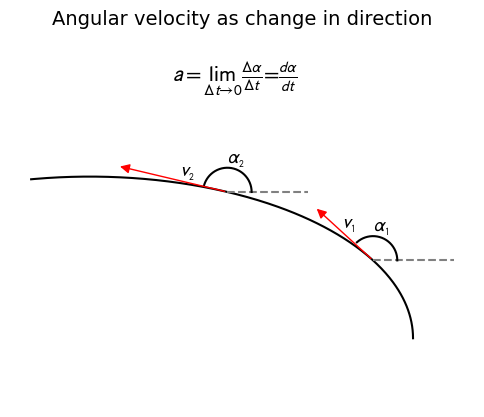

In [129]:
## generate ellipse
dt = 0.001
t0 = np.arange(0, 1, dt)
ys = 100 * np.sin(t0*2*np.pi * 1)
xs = 200 * np.cos(t0*2*np.pi * 1) 


plt.figure(figsize=(6,4))
plt.axis("equal"); plt.xticks([]); plt.yticks([])
plt.title("Angular velocity as change in direction\n\n\n", fontsize= title_size)
plt.suptitle("$a = \\lim_{\\Delta t \\rightarrow 0} \\frac{\\Delta\\alpha}{\\Delta t} = \\frac{d\\alpha}{dt}$", fontsize=formula_size)
plt.plot(xs[00:280], ys[00:280], color="black")   ## ellipse
#plt.plot(xs[950:], ys[950:], color="black")   ## ellipse
plt.axis("off")

t1 = 80
t2 = 180

v1 = ((xs[t1]-xs[t1-1])*60, (ys[t1]-ys[t1-1])*60)
plt.annotate("", xytext=(xs[t1], ys[t1]), xy=(xs[t1]+v1[0], ys[t1]+v1[1]), 
             arrowprops=dict(arrowstyle="-|>", color="red"), zorder=11)

plt.annotate("$v_{_1}$", xy=(xs[t1] - 20, ys[t1]+20))

v1 = ((xs[t2]-xs[t2-1])*60, (ys[t2]-ys[t2-1])*60)
plt.annotate("", xytext=(xs[t2], ys[t2]), xy=(xs[t2]+v1[0], ys[t2]+v1[1]), 
             arrowprops=dict(arrowstyle="-|>", color="red"), zorder=11)

plt.annotate("$v_{_2}$", xy=(xs[t2] - 30, ys[t2]+10))

plt.plot((xs[t1], xs[t1]+50), (ys[t1], ys[t1]), "--", color="gray" )
plt.plot((xs[t2], xs[t2]+50), (ys[t2], ys[t2]), "--", color="gray" )

tc = np.arange(0, 0.75*np.pi, 0.1)
cxs = 15 * np.cos(tc) + xs[t1]
cys = 15 * np.sin(tc) + ys[t1]
plt.plot(cxs, cys, color="black")
plt.annotate("$\\alpha_{_1}$", xy=(xs[t1], ys[t1]+18))


tc = np.arange(0, 0.95*np.pi, 0.1)
cxs = 15 * np.cos(tc) + xs[t2]
cys = 15 * np.sin(tc) + ys[t2]
plt.plot(cxs, cys, color="black")
plt.annotate("$\\alpha_{_2}$", xy=(xs[t2], ys[t2]+18))

plt.savefig("Angular velocity as change in direction diagram.pdf", format="pdf")
plt.show()


